In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
%matplotlib inline

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1VQqAUrUEORfL22A5WvZdcTk9MCSUIZxm' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1VQqAUrUEORfL22A5WvZdcTk9MCSUIZxm" -O hw4_images.zip && rm -rf /tmp/cookies.txt

--2023-02-05 11:29:13--  https://docs.google.com/uc?export=download&confirm=&id=1VQqAUrUEORfL22A5WvZdcTk9MCSUIZxm
Resolving docs.google.com (docs.google.com)... 142.251.2.113, 142.251.2.100, 142.251.2.138, ...
Connecting to docs.google.com (docs.google.com)|142.251.2.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ghr7aj9qjvoahul8h2edr5cmef5k638n/1675596525000/04268100670184909597/*/1VQqAUrUEORfL22A5WvZdcTk9MCSUIZxm?e=download&uuid=c2c699f8-7ecd-426d-a43d-61f863633db8 [following]
--2023-02-05 11:29:13--  https://doc-14-8g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ghr7aj9qjvoahul8h2edr5cmef5k638n/1675596525000/04268100670184909597/*/1VQqAUrUEORfL22A5WvZdcTk9MCSUIZxm?e=download&uuid=c2c699f8-7ecd-426d-a43d-61f863633db8
Resolving doc-14-8g-docs.googleusercontent.com (doc-14-8g-docs.googleusercontent.com)... 142.250.141.132, 2607

In [ ]:
!unzip hw4_images.zip

Archive:  hw4_images.zip
  inflating: Baboon.bmp              
  inflating: Barbara.bmp             
  inflating: F16.bmp                 
  inflating: Lena.bmp                


In [ ]:
lena = cv2.imread('Lena.bmp')
barbara = cv2.imread('Barbara.bmp')
f16 = cv2.imread('F16.bmp')
baboon = cv2.imread('Baboon.bmp')

In [ ]:
def show_img(*args, figsize=10, is_gray=True, title=None, fontsize=12):
    if isinstance(figsize, int):
        figsize = (figsize, figsize)
    images = args[0] if type(args[0]) is list else list(args)
    cmap=None
    if not is_gray:
        images = list(map(lambda x: cv2.cvtColor(x, cv2.COLOR_BGR2RGB), images))
    else:
        cmap = 'gray'
    plt.figure(figsize=figsize)
    for i in range(1, len(images)+1):
        plt.subplot(1, len(images), i)
        if title is not None:
            plt.title(title[i-1], fontsize=fontsize)
        
        plt.imshow(images[i-1], cmap=cmap)
        plt.axis('off')

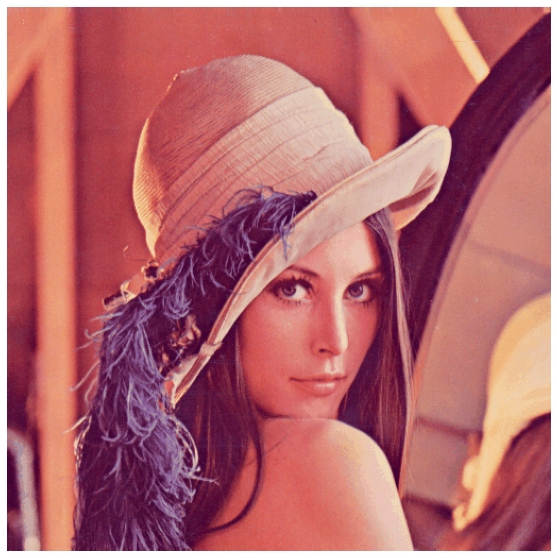

In [ ]:
show_img(lena, is_gray=False)

In [ ]:
#----------------------6.1.1----------------------#
def rgb_to_hsi(img):
    b, g, r = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    
    b = b / 255.0
    g = g / 255.0
    r = r / 255.0
    
    num = 0.5*(r-g) + 0.5*(r-b)
    denum = np.sqrt((r-g)**2 + (r-b)*(g-b))

    theta = np.arccos(num/(denum+0.00001))

    H = np.zeros((img.shape[0], img.shape[1]))
    S = np.zeros((img.shape[0], img.shape[1]))

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):

            if denum[i, j] != 0:
                if b[i, j] <= g[i, j]:
                    H[i, j] = theta[i, j]
                else:
                    H[i, j] = 2*math.pi - theta[i, j]

            _min = min(min(r[i, j], g[i, j]), b[i, j])
            sum = r[i, j] + g[i, j] + b[i, j]
            if (sum != 0):
                S[i, j] = 1 - 3*_min/sum

    H = H/(2*math.pi) * 255

    I = (r+g+b)/3

    return H.astype('uint8'), S, I

In [ ]:
h, s, i = rgb_to_hsi(lena)

In [ ]:
i

8

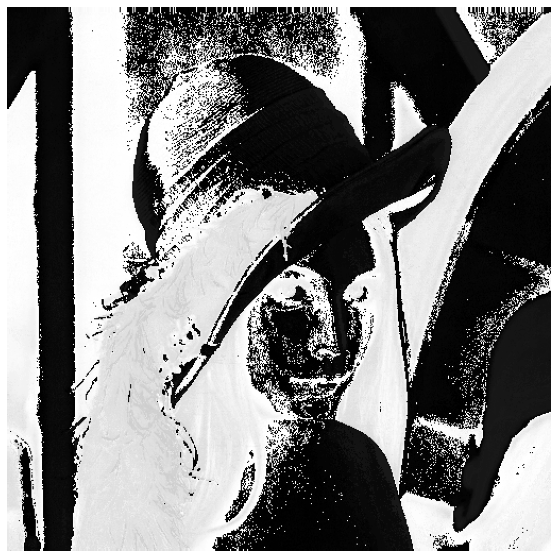

In [ ]:
show_img(h)

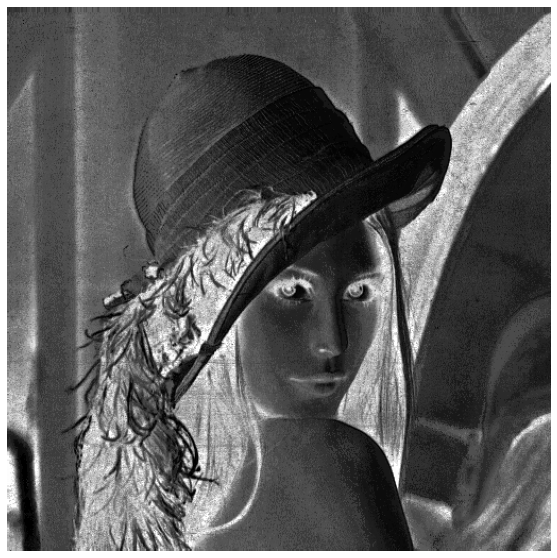

In [ ]:
show_img(s)

In [ ]:
#----------------------6.2.1----------------------#
def quantize(img, k):
    n = 8 - k
    img = img >> n
    alpha = math.floor(255/(2**k - 1))
    return img * alpha

def mse(img1, img2):
    diff = (img1 - img2) ** 2
    return np.sum(diff.ravel()) / (img1.shape[0] * img1.shape[1])

def quantize_rgb(img, k1, k2, k3):
    B, G, R = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    
    R = quantize(R, k1)
    G = quantize(G, k2)
    B = quantize(B, k3)
    
    r = np.zeros((img.shape[0], img.shape[1], img.shape[2]))
    r[:, :, 0] = B
    r[:, :, 1] = G
    r[:, :, 2] = R
    
    return r.astype('uint8'), mse(img, r), cv2.PSNR(img, r.astype('uint8'))

number of bits:  3 -> psnr is:  26.114930769898006   mse is:  477.2089042663574
number of bits:  4 -> psnr is:  33.17360801130215   mse is:  93.93789291381836
number of bits:  5 -> psnr is:  36.884756195216674   mse is:  39.9692497253418
number of bits:  6 -> psnr is:  46.20774590725071   mse is:  4.671184539794922


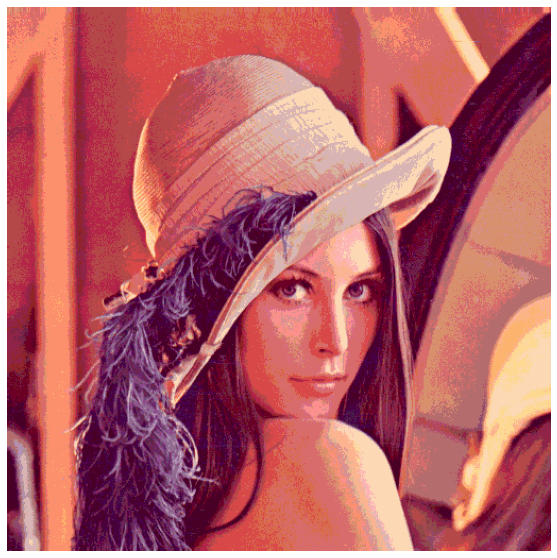

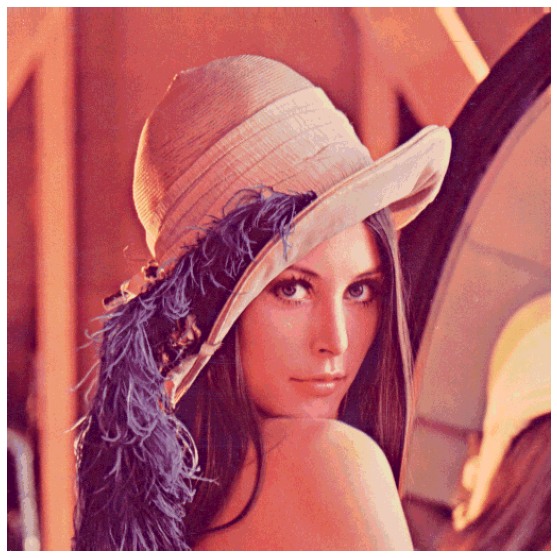

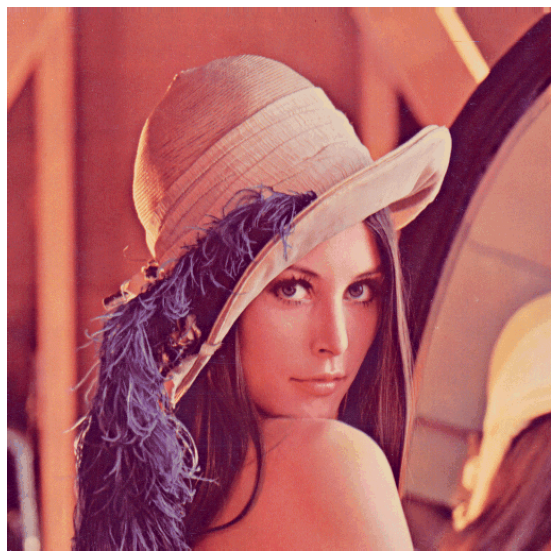

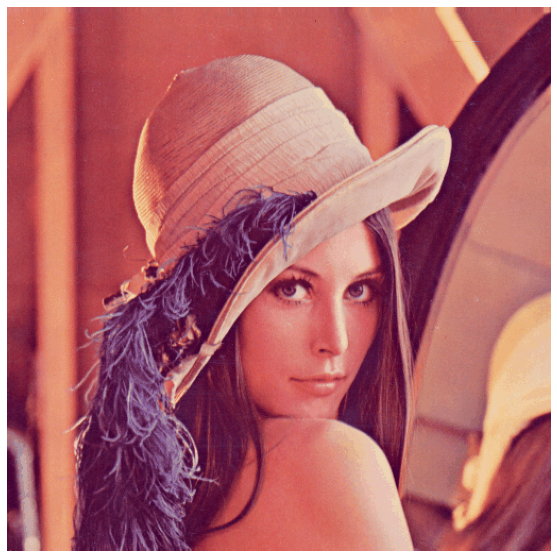

In [ ]:
for i in [3, 4, 5, 6]:
    r, mse_v, psnr_v = quantize_rgb(lena, i, i, i)
    
    show_img(r, is_gray=False)
    print('number of bits: ', i, end=' -> ')
    print ('psnr is: ', psnr_v, end='   ')
    print ('mse is: ', mse_v)

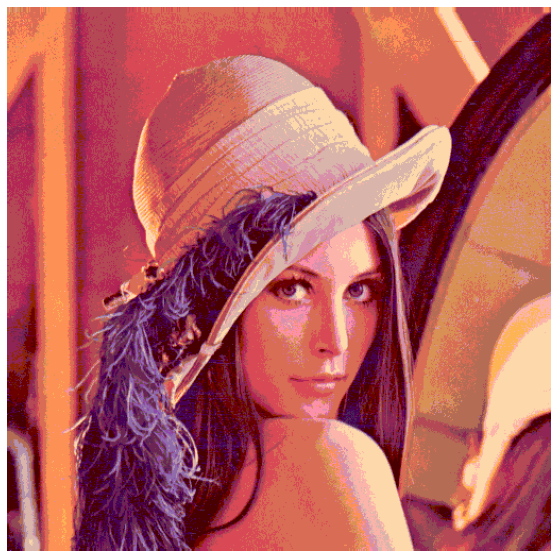

In [ ]:
#----------------------6.2.2----------------------#

r, m, p = quantize_rgb(lena, 3, 3, 2)
show_img(r, is_gray=False)

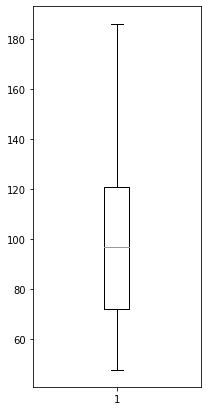

In [ ]:
fig = plt.figure(figsize =(3, 7))
plt.boxplot(lena[:,:,0].flatten())
plt.show()

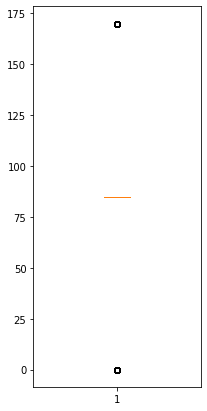

In [ ]:
fig = plt.figure(figsize =(3, 7))
plt.boxplot(r[:,:,0].flatten())
plt.show()

In [ ]:
#----------------------6.2.3----------------------#
def reduce_color(img, k):
    shape = img.shape
    kmeans_model = KMeans(n_clusters=k, random_state=0)
    kmeans_model.fit_predict(img.reshape(shape[0]*shape[1], shape[2]))
    centroids = kmeans_model.cluster_centers_.astype('uint8')
    l = kmeans_model.labels_.reshape(shape[0], shape[1])
    r = np.empty(shape=shape)

    for i in range(l.shape[0]):
        for j in range(l.shape[1]):
            r[i,j,:] = centroids[l[i, j]]

    return r.astype('uint8'), mse(img, r), cv2.PSNR(img, r.astype('uint8'))

In [ ]:
for i in [32, 16, 8]:
    quan, m, p = reduce_color(baboon, i)
    # show_img(quan, is_gray=False)
    print('number of colors: ', i, end=' -> ')
    print ('psnr is: ', p, end='   ')
    print ('mse is: ', m)

number of colors:  32 -> psnr is:  27.17232385257217   mse is:  374.0840835571289
number of colors:  16 -> psnr is:  24.919908562603908   mse is:  628.363224029541
number of colors:  8 -> psnr is:  22.421344119012375   mse is:  1117.0360870361328


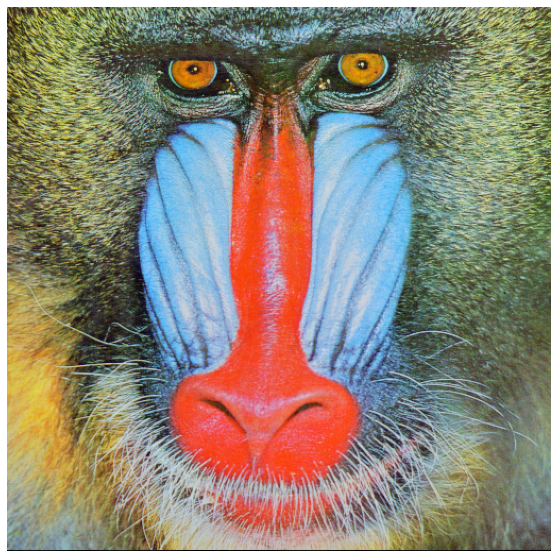

In [ ]:
show_img(baboon, is_gray=False)